### Import libraries

In [1]:
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models

### Draw images loaded

In [2]:
path = "../dataset.hdf5"
f = h5py.File(path, "r")

train_images = np.copy(f.get('train').get('images'))
train_labels = np.copy(f.get('train').get('labels'))
test_images = np.copy(f.get('test').get('images'))
test_labels = np.copy(f.get('test').get('labels'))

f.close()

### Test dataset

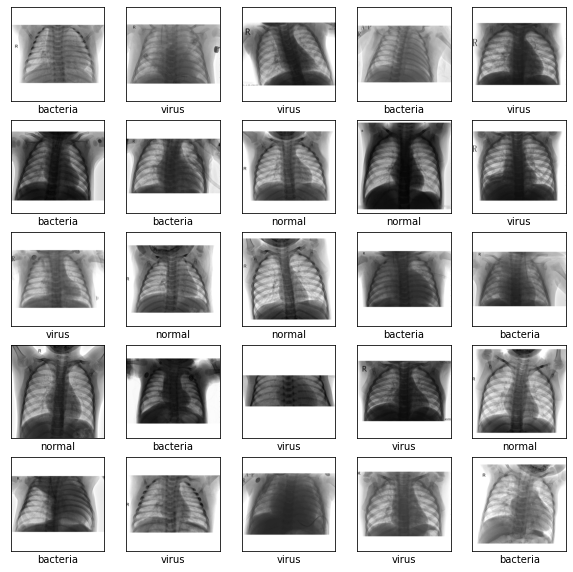

In [3]:
class_names = ['normal', 'bacteria', 'virus']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Train with Tensorflow

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
163/163 [==============================] - 164s 1s/step - loss: 1.0168 - accuracy: 0.5826 - val_loss: 0.7837 - val_accuracy: 0.7276
Epoch 2/10
163/163 [==============================] - 167s 1s/step - loss: 0.5268 - accuracy: 0.7728 - val_loss: 0.7456 - val_accuracy: 0.7516
Epoch 3/10
163/163 [==============================] - 165s 1s/step - loss: 0.4977 - accuracy: 0.7798 - val_loss: 0.6797 - val_accuracy: 0.7740
Epoch 4/10
163/163 [==============================] - 164s 1s/step - loss: 0.4466 - accuracy: 0.8003 - val_loss: 1.1119 - val_accuracy: 0.6474
Epoch 5/10
163/163 [==============================] - 164s 1s/step - loss: 0.3716 - accuracy: 0.8363 - val_loss: 1.0796 - val_accuracy: 0.6843
Epoch 6/10
163/163 [==============================] - 164s 1s/step - loss: 0.3780 - accuracy: 0.8338 - val_loss: 1.4286 - val_accuracy: 0.6923
Epoch 7/10
163/163 [==============================] - 164s 1s/step - loss: 0.3150 - accuracy: 0.8627 - val_loss: 1.0256 - val_accuracy: 0.7003

### Save the model

In [10]:
model.save("../model/cnn/all")

INFO:tensorflow:Assets written to: ../model/cnn/all/assets
